In [62]:
import os
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [110]:
# GET DATA
os.chdir("C:/users/devon/documents/github/sign-language-project/project data/sign_mnist_train.csv")
train = pd.read_csv("sign_mnist_train.csv")

In [111]:
# VIEW RAW DATA
print(train.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [112]:
# SHOW MATRIX
x = data.iloc[:, 1:].values
print('Feature matrix:\n', x, '\n')

Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]] 



In [113]:
# SHOW LABELS
y = data.iloc[:, :1].values.flatten()
print('Labels:\n', y)

Labels:
 [ 3  6  2 ... 18 17 23]


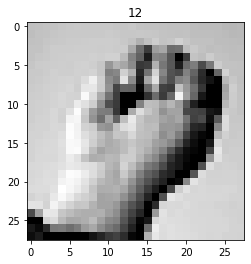

In [114]:
# VIEW A PIECE OF THE DATA
plt.title(str(y[100]))
plt.imshow(x[100].reshape(28, 28), cmap = 'gray')
plt.show()

In [115]:
# ENCODE Y
encode_y = np.eye(25)[y]
print(encode_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [116]:
# SET WEIGHTS
weights = {
    'w1' : tf.Variable(tf.random_normal([784, 256])),
    'w2' : tf.Variable(tf.random_normal([256, 256])),
    'w3' : tf.Variable(tf.random_normal([256, 256])),
    'w4' : tf.Variable(tf.random_normal([256, 256])),
    'w5' : tf.Variable(tf.random_normal([256, 256])),
    '_w' : tf.Variable(tf.random_normal([256, 25]))
}

In [117]:
# SET BIASES
biases = {
    'b1' : tf.Variable(tf.random_normal([256])),
    'b2' : tf.Variable(tf.random_normal([256])),
    'b3' : tf.Variable(tf.random_normal([256])),
    'b4' : tf.Variable(tf.random_normal([256])),
    'b5' : tf.Variable(tf.random_normal([256])),
    '_b' : tf.Variable(tf.random_normal([25]))
}

In [134]:
# NETWORK X AND Y
_x = tf.placeholder('float', [None, 784])
_y = tf.placeholder('float', [None, 25])

In [135]:
# NEURAL NETWORK
def neural_network(x, weights, biases):
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer_out = tf.matmul(layer5, weights['_w']) + biases['_b']
    return layer_out

In [136]:
# NEXT BATCH
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [137]:
# PREDICTIONS
def get_predictions(x, w, b):
    pred = neural_network(x, w, b)
    images, predictions = [], []
    for i in x:
        images.append(i.reshape(28, 28))
    for i in pred:
        predictions.append(list(i))
    predictions = [chr(int(i.index(max(i))) + ord('A')) for i in predictions]
    return (images, predictions)

In [131]:
# SET PARAMETERS
learning_rate = 0.002
batch_size = 128
epochs = 5000
step = 500

In [126]:
# SET UP OPTIMIZER
init = tf.global_variables_initializer()
logits = neural_network(_x, weights, biases)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [133]:
# SET LOSS AND TRAINING OPTIMIZER
loss_optimizer = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = _y))
training_optimizer = optimizer.minimize(loss_optimizer)

In [132]:
# SET PREDICTION AND ACCURACY
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))